In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [154]:
# Extract & Transform
df = pd.read_csv('data/produkt_zehn_min_sd_20200101_20201231_05705.txt', delimiter = ";")

# Remove unneccesary columns
df.drop(['STATIONS_ID', '  QN', 'DS_10', 'SD_10', 'LS_10', 'eor'], axis = 1, inplace = True)

# / 1000 to convert from J/cm² to kJ/cm² then * 2.78 to convert to kWh/m², then * 50m^2 and * 6000 to convert to W/10 Min/m²) 
df['Watt_10min'] =  df['GS_10'] / 1000 * 2.78 * 50 * 6000 * 0.2

df['Watt_1h_ahead'] = df['Watt_10min'].rolling(6).sum().shift(-6).fillna(0)

df['Watt_4h_ahead'] = df['Watt_10min'].rolling(24).sum().shift(-24).fillna(0)

df['Watt_12h_ahead'] = df['Watt_10min'].rolling(72).sum().shift(-72).fillna(0)

df['Watt_24h_ahead'] = df['Watt_10min'].rolling(144).sum().shift(-144).fillna(0)

df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M')

df.set_index('MESS_DATUM', inplace=True)

cols = ['Watt_10min', 'Watt_1h_ahead','Watt_4h_ahead', 'Watt_12h_ahead', 'Watt_24h_ahead']
df[cols] = df[cols].apply(lambda x: pd.Series.round(x, 1))
df['data_string'] = df.apply(lambda x :';'.join(x.astype(str)),1)

df.head(60)


,GS_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead,data_string
MESS_DATUM,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,23151.8,37897.0,0.0;0.0;0.0;0.0;23151.8;37897.0
2020-01-01 00:10:00,0.0,0.0,0.0,0.0,24536.3,37897.0,0.0;0.0;0.0;0.0;24536.3;37897.0
2020-01-01 00:20:00,0.0,0.0,0.0,0.0,25687.2,37897.0,0.0;0.0;0.0;0.0;25687.2;37897.0
2020-01-01 00:30:00,0.0,0.0,0.0,0.0,26954.9,37897.0,0.0;0.0;0.0;0.0;26954.9;37897.0
2020-01-01 00:40:00,0.0,0.0,0.0,0.0,28172.5,37897.0,0.0;0.0;0.0;0.0;28172.5;37897.0
2020-01-01 00:50:00,0.0,0.0,0.0,0.0,29456.9,37897.0,0.0;0.0;0.0;0.0;29456.9;37897.0
2020-01-01 01:00:00,0.0,0.0,0.0,0.0,30607.8,37897.0,0.0;0.0;0.0;0.0;30607.8;37897.0
2020-01-01 01:10:00,0.0,0.0,0.0,0.0,31608.6,37897.0,0.0;0.0;0.0;0.0;31608.6;37897.0
2020-01-01 01:20:00,0.0,0.0,0.0,0.0,32576.0,37897.0,0.0;0.0;0.0;0.0;32576.0;37897.0


In [143]:
# Filter
start_date = '2020-06-01 00:00:00'
end_date = '2020-06-02 00:00:00'

mask = (df.index >= start_date) & (df.index < end_date)

selected_dates = df.loc[mask]

#selected_dates.set_index('MESS_DATUM')

selected_dates.head()




,GS_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead,data_string
MESS_DATUM,,,,,,,
2020-06-01 00:00:00,0.0,0,0,767,285881,499885,0.0;0.0;0.0;767.0;285881.0;499885.0
2020-06-01 00:10:00,0.0,0,0,1401,295022,499885,0.0;0.0;0.0;1401.0;295022.0;499885.0
2020-06-01 00:20:00,0.0,0,0,2252,304096,499885,0.0;0.0;0.0;2252.0;304096.0;499885.0
2020-06-01 00:30:00,0.0,0,0,3320,313103,499885,0.0;0.0;0.0;3320.0;313103.0;499885.0
2020-06-01 00:40:00,0.0,0,0,4604,321993,499885,0.0;0.0;0.0;4604.0;321993.0;499885.0


Text(0, 0.5, 'Watt')

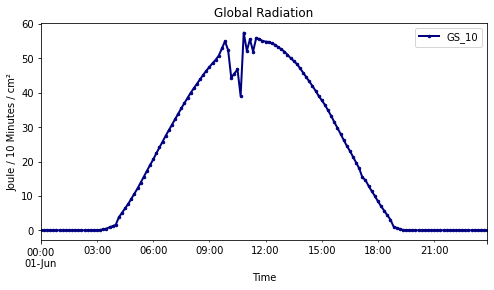

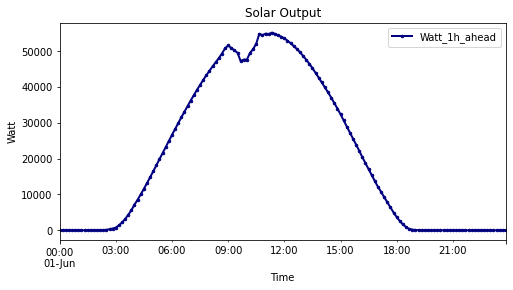

In [93]:
# Plot
ax = selected_dates.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Global Radiation', figsize=(8, 4), x='MESS_DATUM', y='GS_10')
ax.set_xlabel("Time")
ax.set_ylabel("Joule / 10 Minutes / cm²")

ax = selected_dates.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Solar Output', figsize=(8, 4), x='MESS_DATUM', y='Watt_1h_ahead')
ax.set_xlabel("Time")
ax.set_ylabel("Watt")